# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
#?t= is a query param for title of 

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Range of latitudes and longitudes
LAT_RANGE = (-90, 90)
LNG_RANGE = (-180, 180)
NUM_POINTS = 20    # DEBUG 15000
URL = 'https://api.openweathermap.org/data/2.5/weather'
HTTP_STATUS_NOT_FOUND = 404

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(LAT_RANGE[0], LAT_RANGE[1], size=NUM_POINTS)
lngs = np.random.uniform(LNG_RANGE[0], LNG_RANGE[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 17


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
params = {'appid': weather_api_key, 'units': 'metric',}
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1

    # Run an API request for each of the cities
    params['q'] = city
    # Parse the JSON and retrieve data
    response = requests.get(URL, params=params)
    if response.ok:
        city_weather = response.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                         })
    elif response.status_code == HTTP_STATUS_NOT_FOUND:
        print(f"City {city} not found")
    else:
        raise ValueError(f"unknown status code {response.status_code} for params: {params}") 
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pishin
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | magadan
Processing Record 9 of Set 1 | aasiaat
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | mount pearl
Processing Record 12 of Set 1 | mpanda
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | napier
Processing Record 15 of Set 1 | hinton
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | crane
-----------------------------
Data Retrieval Complete      
-----------------------------


In [ ]:
city_weather['sys']['country']


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          17
Lat           17
Lng           17
Max Temp      17
Humidity      17
Cloudiness    17
Wind Speed    17
Country       17
Date          17
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pishin,30.5803,66.9961,26.95,50,90,1.63,PK,1721509825
1,tiksi,71.6872,128.8694,6.78,63,96,1.56,RU,1721509825
2,papatowai,-46.5619,169.4708,7.50,95,43,2.52,NZ,1721509826
3,waitangi,-43.9535,-176.5597,10.46,98,100,5.81,NZ,1721509826
4,ribeira grande,38.5167,-28.7000,24.32,88,40,4.12,PT,1721509826


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
print(city_data_df.shape)
city_data_df.head()

(17, 9)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pishin,30.5803,66.9961,26.95,50,90,1.63,PK,1721509825
1,tiksi,71.6872,128.8694,6.78,63,96,1.56,RU,1721509825
2,papatowai,-46.5619,169.4708,7.50,95,43,2.52,NZ,1721509826
3,waitangi,-43.9535,-176.5597,10.46,98,100,5.81,NZ,1721509826
4,ribeira grande,38.5167,-28.7000,24.32,88,40,4.12,PT,1721509826


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

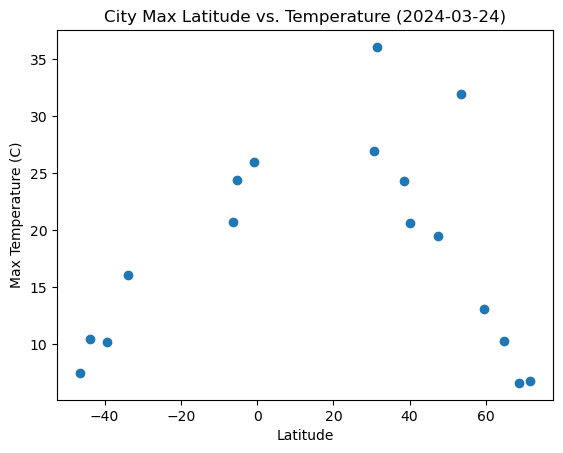

In [12]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(
    x=x,
    y=y
)

# Step 4: add title and labels
plt.title('City Max Latitude vs. Temperature (2024-03-24)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

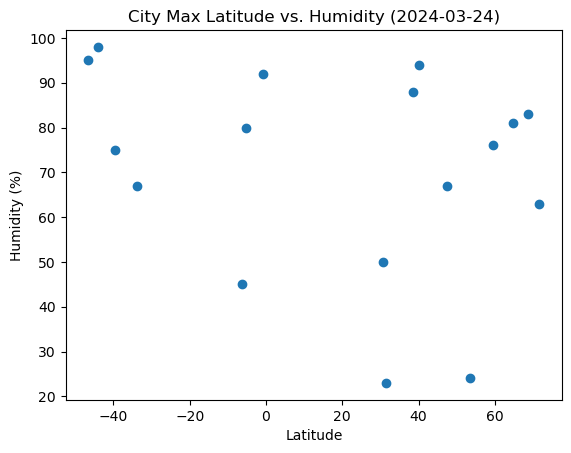

In [13]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(
    x=x,
    y=y
)

plt.title('City Max Latitude vs. Humidity (2024-03-24)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

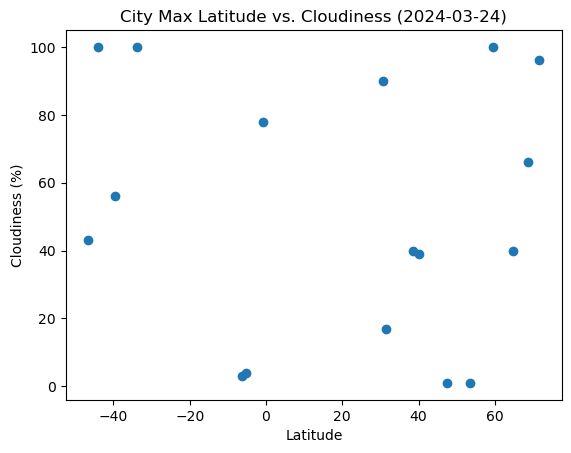

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(
    x=x,
    y=y
)

plt.title('City Max Latitude vs. Cloudiness (2024-03-24)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

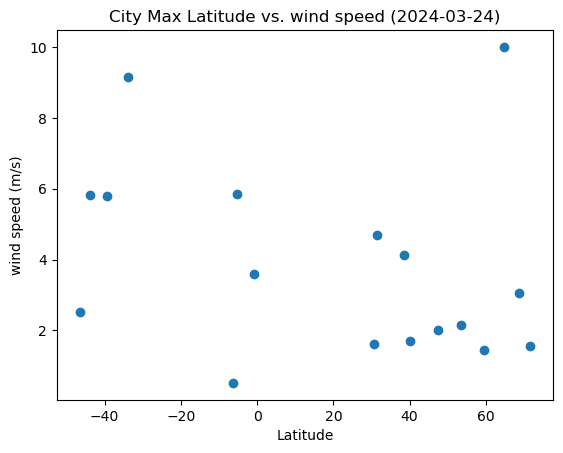

In [15]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']


# Incorporate the other graph properties
plt.scatter(
    x=x,
    y=y
)

plt.title('City Max Latitude vs. wind speed (2024-03-24)')
plt.xlabel('Latitude')
plt.ylabel('wind speed (m/s)')


# Save the figure
plt.savefig("output_data/Fig4.png")


# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # y= mx + c 
    regress_values = x_values * slope + intercept
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}'

    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()
    return rvalue**2

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
filt_NH=city_data_df.loc[city_data_df['Lat']>=0]
northern_hemi_df=pd.DataFrame(filt_NH)

# Display sample data
print(northern_hemi_df.shape)
northern_hemi_df.head()

(10, 9)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pishin,30.5803,66.9961,26.95,50,90,1.63,PK,1721509825
1,tiksi,71.6872,128.8694,6.78,63,96,1.56,RU,1721509825
4,ribeira grande,38.5167,-28.7000,24.32,88,40,4.12,PT,1721509826
7,magadan,59.5667,150.8000,13.07,76,100,1.45,RU,1721509827
8,aasiaat,68.7098,-52.8699,6.61,83,66,3.07,GL,1721509827


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
filt_SH=city_data_df.loc[city_data_df['Lat']<0]
southern_hemi_df=pd.DataFrame(filt_SH)

# Display sample data
print(northern_hemi_df.shape)
southern_hemi_df.head()

(10, 9)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,papatowai,-46.5619,169.4708,7.50,95,43,2.52,NZ,1721509826
3,waitangi,-43.9535,-176.5597,10.46,98,100,5.81,NZ,1721509826
5,margaret river,-33.9500,115.0667,16.05,67,100,9.14,AU,1721509826
6,touros,-5.1989,-35.4608,24.45,80,4,5.84,BR,1721509826
9,puerto ayora,-0.7393,-90.3518,25.98,92,78,3.58,EC,1721509827


###  Temperature vs. Latitude Linear Regression Plot

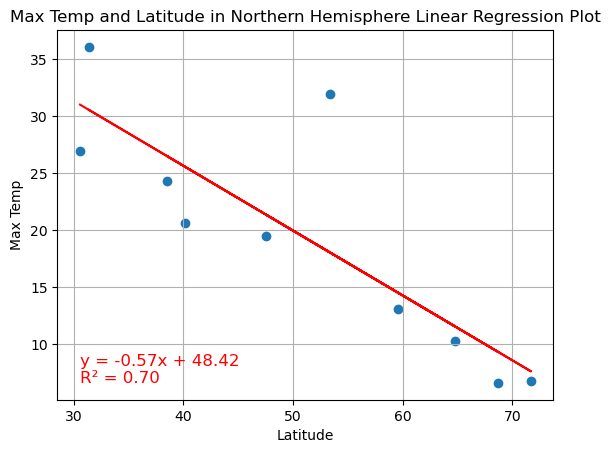

In [27]:
# Linear regression on Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Latitude', 'Max Temp','Max Temp and Latitude in Northern Hemisphere Linear Regression Plot')
# print("The r-value is:", rvalue)
plt.show()

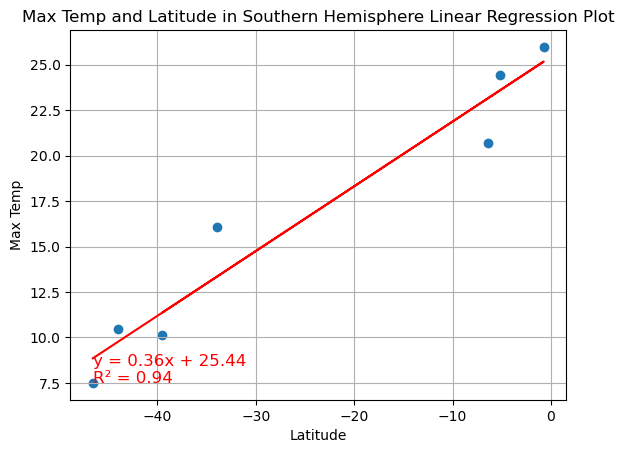

The r-value is: 0.9432918252075845


In [28]:
# Linear regression on Southern Hemisphere
rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Latitude', 'Max Temp','Max Temp and Latitude in Southern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()

**Discussion about the linear relationship:** The analysis reveals a strong positive correlation (R=0.7) between maximum temperature and latitude in the Northern Hemisphere, indicating a clear trend of decreasing temperatures as one moves away from the equator. The Southern Hemisphere demonstrates a strong positive correlation (R=0.94), suggesting a similar relationship between maximum temperature and latitude in that region.

### Humidity vs. Latitude Linear Regression Plot

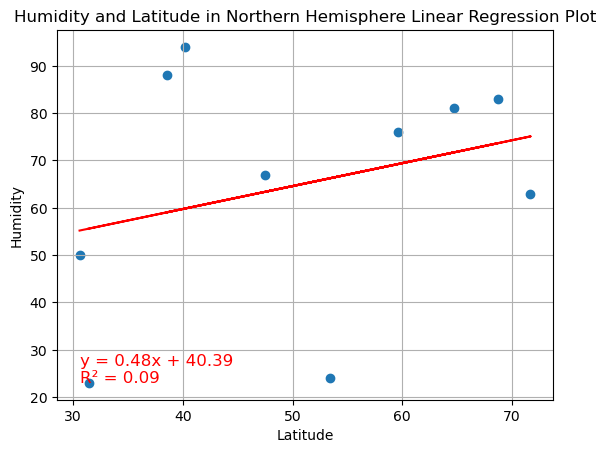

The r-value is: 0.08538559622627373


In [31]:
# Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Latitude', 'Humidity','Humidity and Latitude in Northern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()

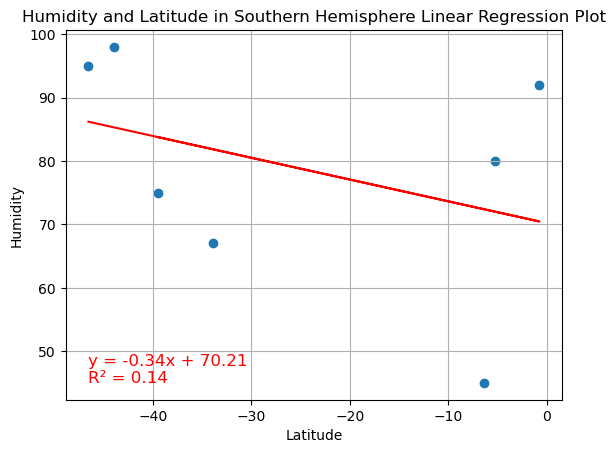

The r-value is: 0.1368776989044093


In [32]:
# Southern Hemisphere
rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Latitude', 'Humidity','Humidity and Latitude in Southern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()

**Discussion about the linear relationship:** The linear regression analysis indicates a very weak positive correlation (R=0.06) between humidity and latitude in the Northern Hemisphere, suggesting minimal association between these variables. Similarly, in the Southern Hemisphere, the correlation between humidity and latitude is also very weak (R=0.14), implying little relationship between humidity levels and latitude in that region.

### Cloudiness vs. Latitude Linear Regression Plot

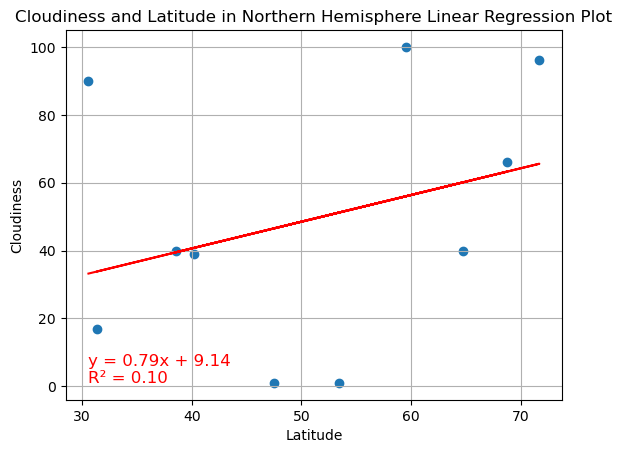

The r-value is: 0.10244572229509386


In [33]:
# Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness','Cloudiness and Latitude in Northern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()

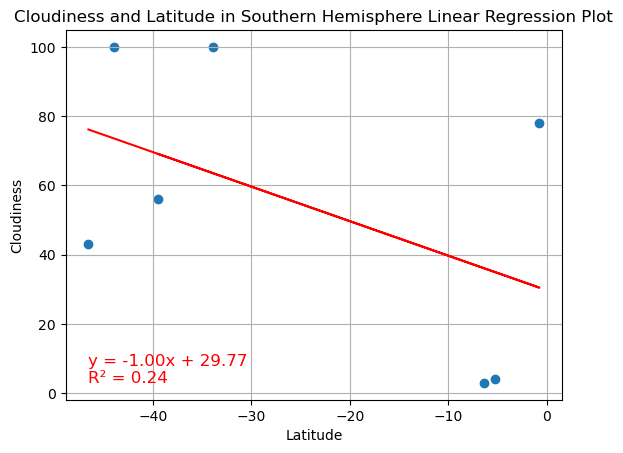

The r-value is: 0.24162197158189586


In [34]:
# Southern Hemisphere
rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness','Cloudiness and Latitude in Southern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()

**Discussion about the linear relationship:** The linear regression analysis demonstrates a weak correlation (R=0.10) between cloudiness and latitude in the Northern Hemisphere, indicating that latitude has minimal influence on cloud cover in this region. Similarly, in the Southern Hemisphere, the correlation between cloudiness and latitude is also weak (R=0.24), suggesting little relationship between these variables in southern latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

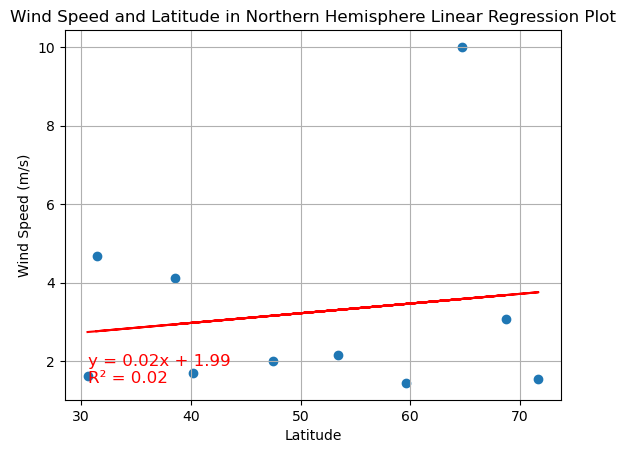

The r-value is: 0.02043762634392835


In [35]:
# Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed (m/s)','Wind Speed and Latitude in Northern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()

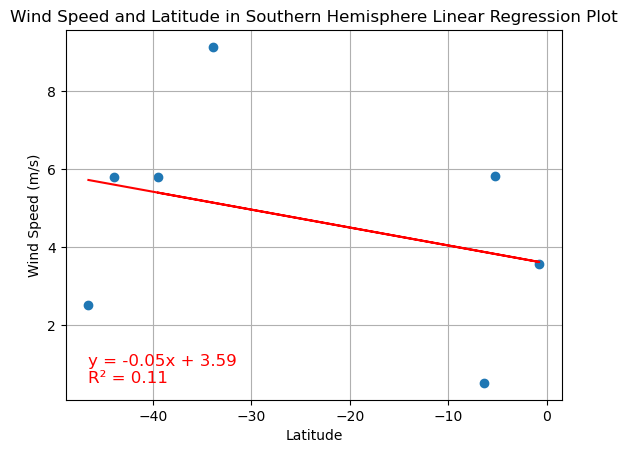

The r-value is: 0.10976188717093241


In [36]:
# Southern Hemisphere
rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed (m/s)','Wind Speed and Latitude in Southern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()

**Discussion about the linear relationship:** The linear regression analysis reveals no significant correlation (R=0.02) between wind speed and latitude in the Northern Hemisphere, indicating that latitude does not have a discernible influence on wind speed in this region. Conversely, in the Southern Hemisphere, there is also a weak positive correlation (R=0.11) between wind speed and latitude, suggesting a slight tendency for wind speed to increase with increasing distance from the equator in southern latitudes.